In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import linalg
from scipy.sparse.linalg import eigs
import cv2
import math
from IPython.display import Image, display

In [3]:
class TransferedPicture: #画像の相似変換
    def __init__(self,pic,scale,theta):
        self.orig_img=cv2.imread(pic)
        h,w,c=self.orig_img.shape
        mat = cv2.getRotationMatrix2D((w / 2, h / 2), theta, scale) #相似変換のパラメータ設定
        self.img = cv2.warpAffine(self.orig_img, mat, (w, h)) #相似変換を実行
        self.scale=scale
        self.theta=theta
    
    def write(self,img_name):
        cv2.imwrite(img_name,self.img)
        
    def get_np_img_array(self): #オリジナル画像と変換後画像のnumpy配列を得る
        return np.array(self.orig_img),np.array(self.img)
    
    def get_np_gray_array(self): #オリジナル画像と変換後画像のグレースケールでのnumpy配列を得る
        orig_gray=cv2.cvtColor(self.orig_img,cv2.COLOR_BGR2GRAY)
        img_gray=cv2.cvtColor(self.img,cv2.COLOR_BGR2GRAY)
        return np.array(orig_gray),np.array(img_gray)

pic_name="pic1.png"
pic_st_name="pic2.png"
scale,theta=0.6,60
tp=TransferedPicture(pic_name,scale,theta)
tp.write(pic_st_name)
orig_array,st_array=tp.get_np_img_array()
orig_gray_array,st_gray_array=tp.get_np_gray_array()

In [15]:
def imshow(img):
    #ndarray 配列から画像をNotebook上に表示
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

In [4]:
#I'の計算
h,w,c=st_array.shape
mat = cv2.getRotationMatrix2D((w / 2, h / 2), -1*theta, 1/scale)
i_dash= cv2.warpAffine(st_array, mat, (w, h))
i_dash.shape

(1396, 1396, 3)

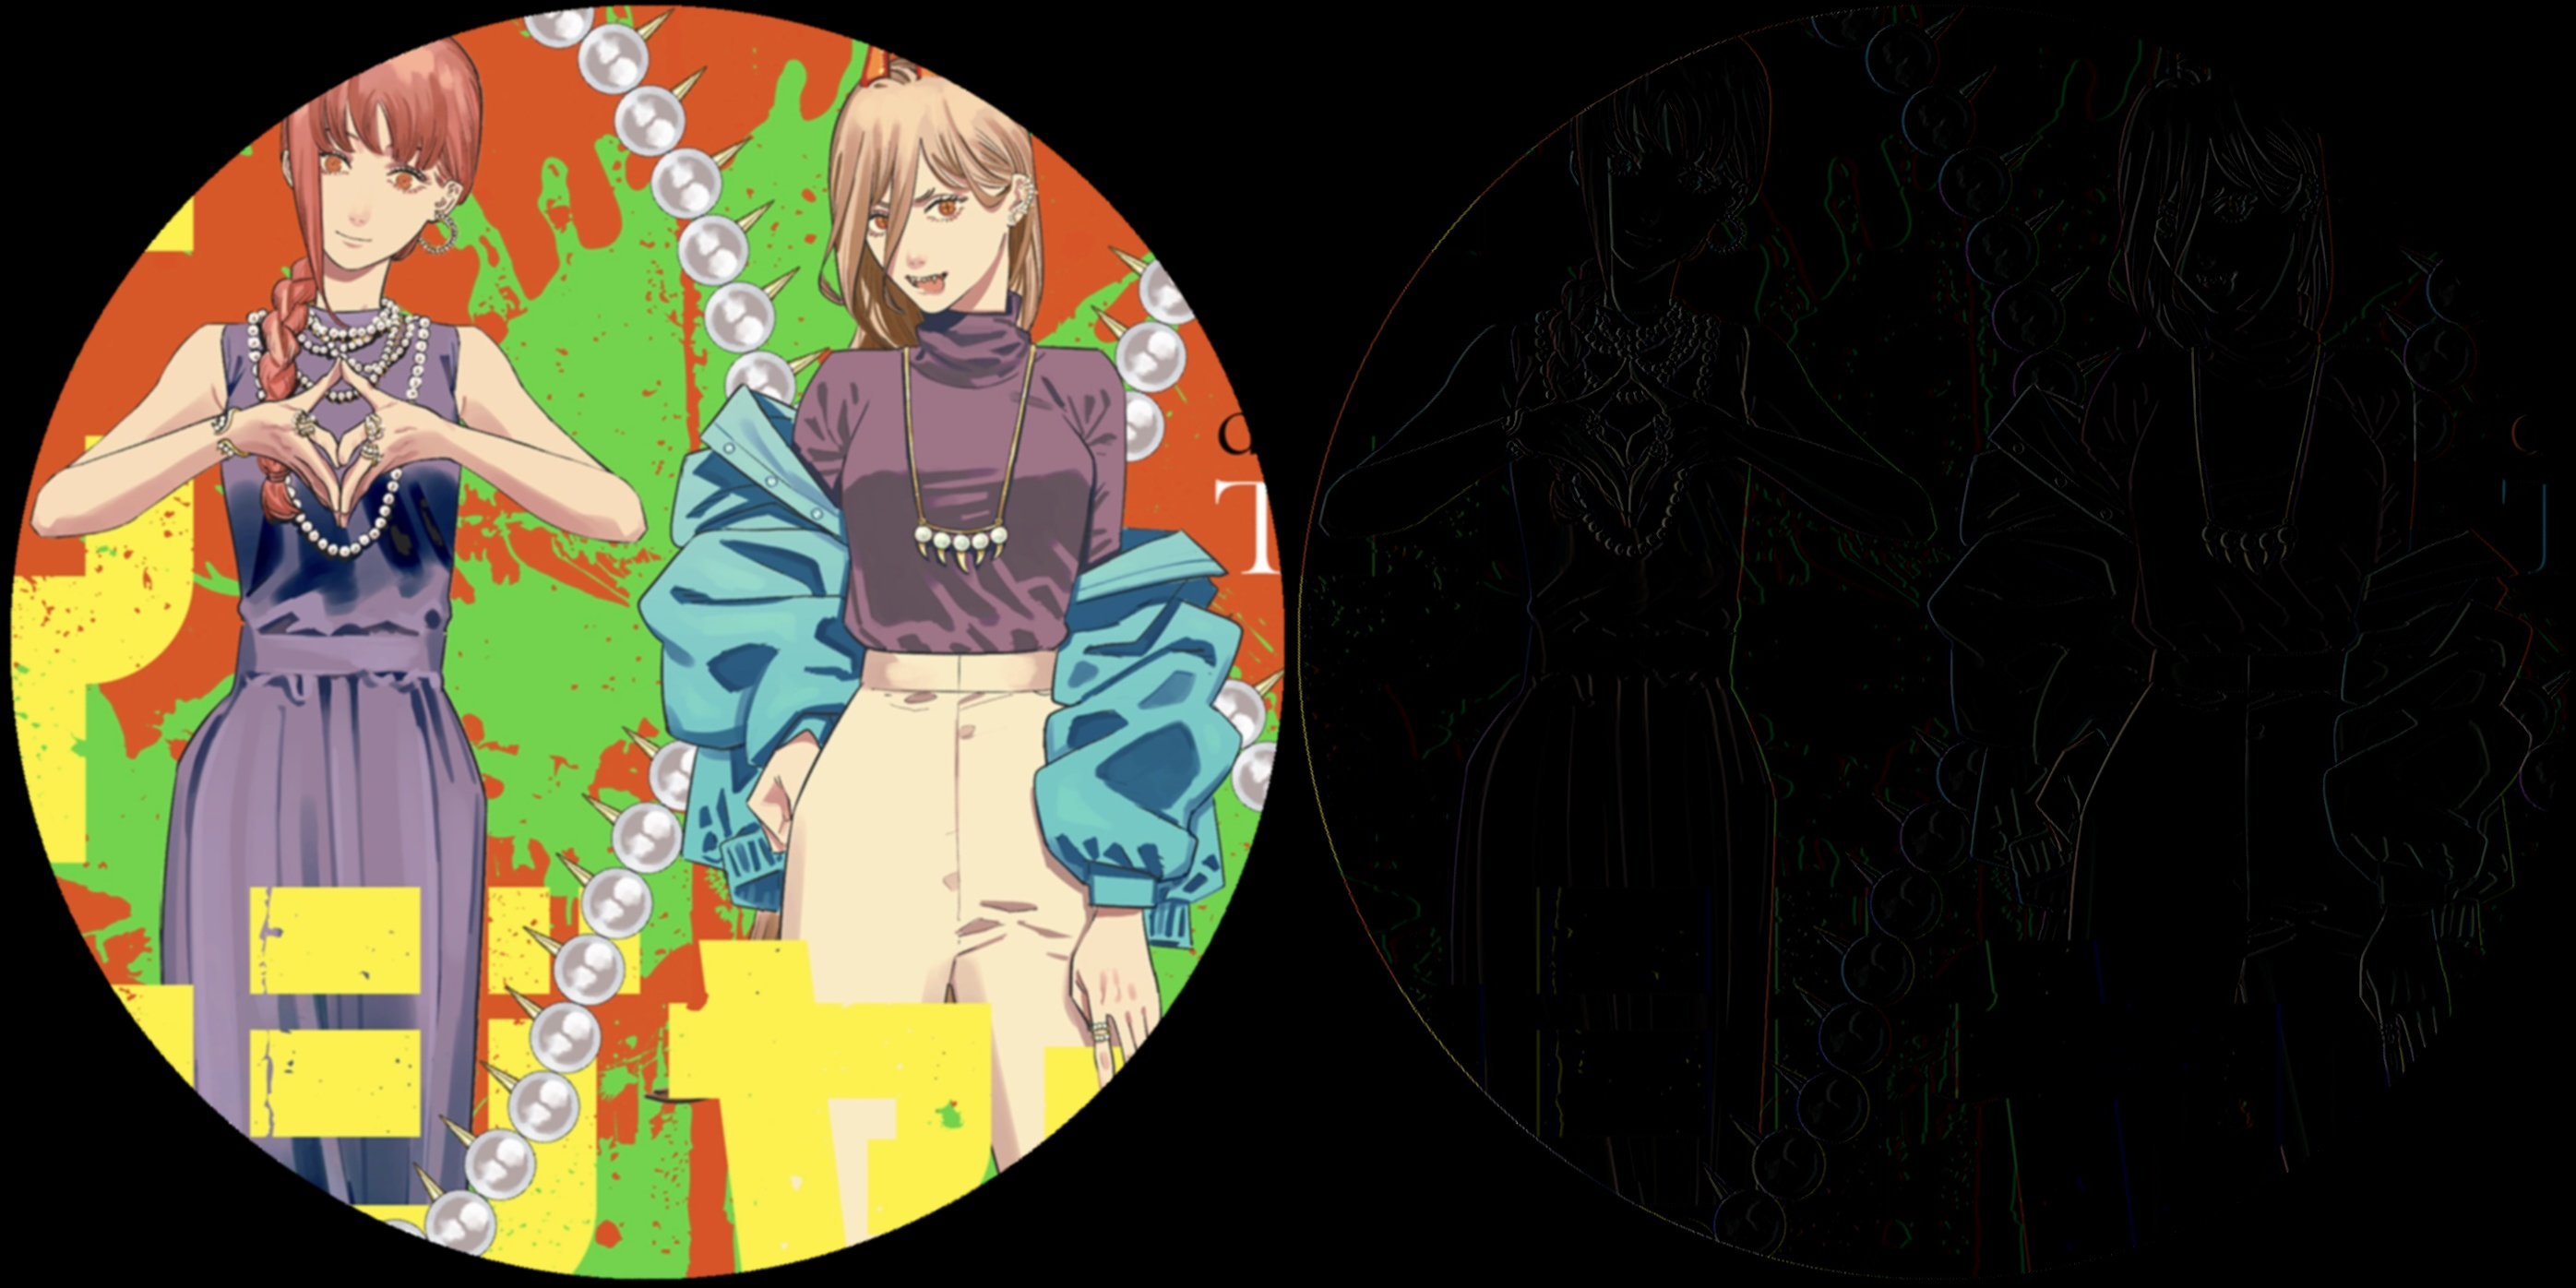

In [13]:
#x方向の微分
#kernel = 0.5 * np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
#dst = cv2.filter2D(i_dash, -1, kernel)

#ガウシアンフィルタによる平滑化
#gs=cv2.GaussianBlur(dst,(3,3),3)
#imgs=cv2.hconcat([dst,gs])

gs=cv2.GaussianBlur(i_dash,(3,3),3)
kernel = 0.5 * np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
dst = cv2.filter2D(i_dash, -1, kernel)
imgs=cv2.hconcat([gs,dst])

imshow(imgs)

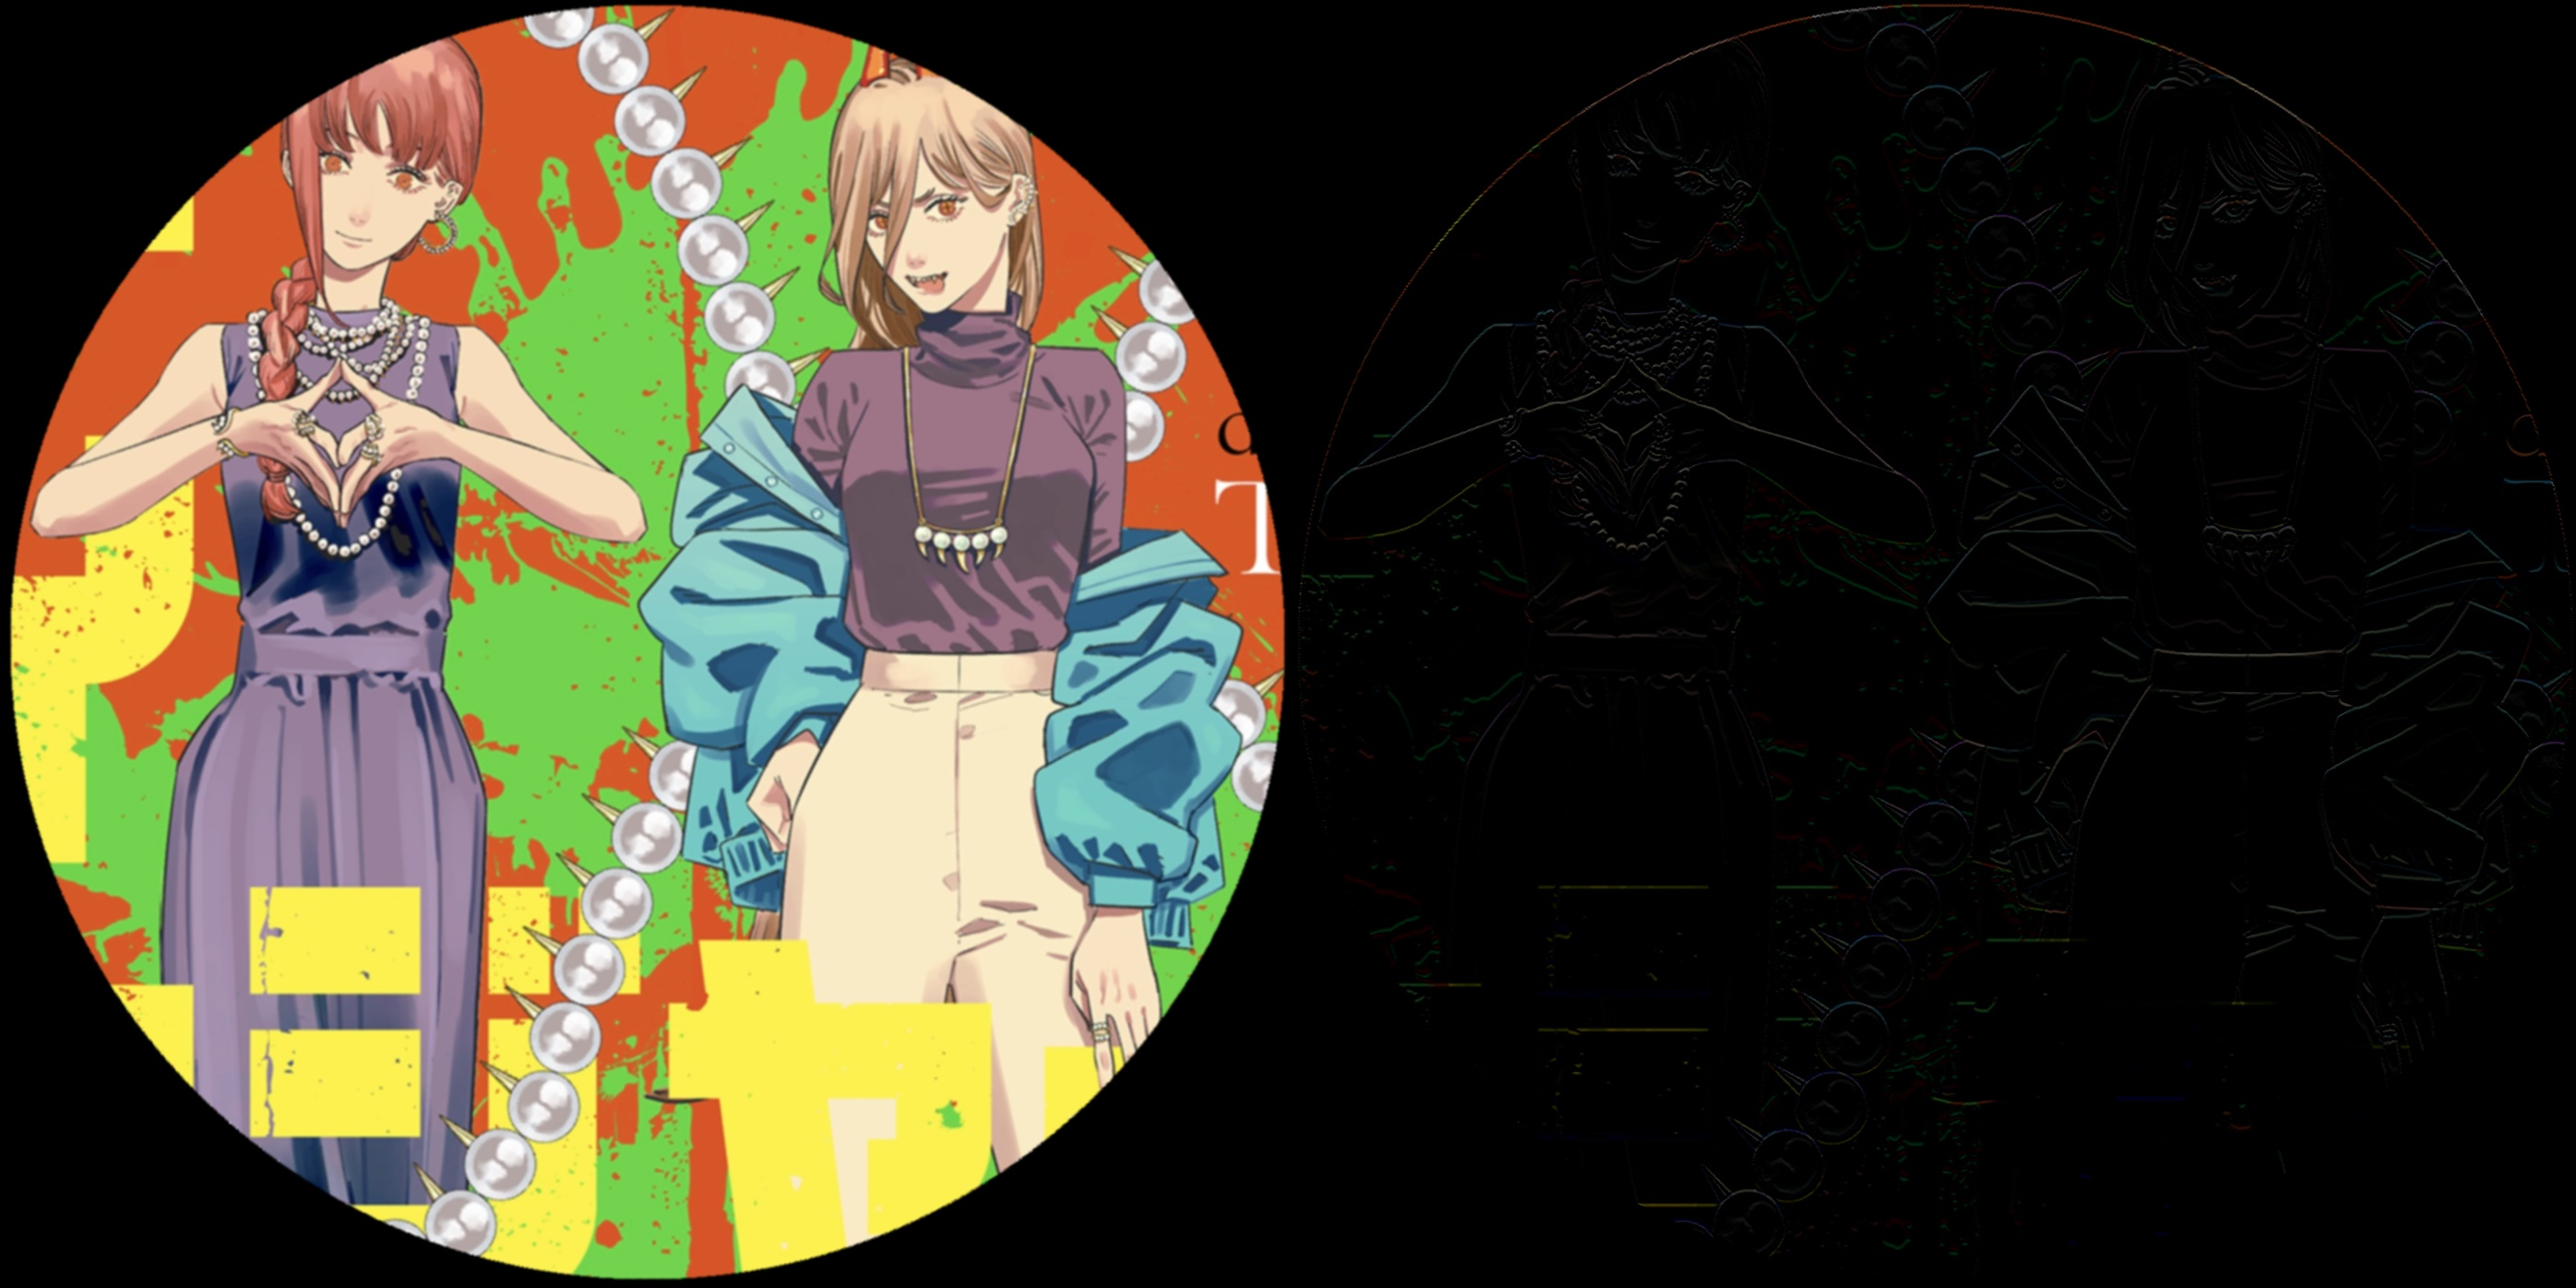

In [14]:
#y方向の微分
gs=cv2.GaussianBlur(i_dash,(3,3),3)
kernel = 0.5 * np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]])
dst = cv2.filter2D(i_dash, -1, kernel)
imgs=cv2.hconcat([gs,dst])

imshow(imgs)

In [5]:
pic_name="pic1.jpeg"
scale,theta=0.6,60
img = cv2.imread(pic_name)
h,w,c=img.shape
mat = cv2.getRotationMatrix2D((w / 2, h / 2), theta, scale)
sim_img = cv2.warpAffine(img, mat, (w, h))
cv2.imwrite('picture.png', sim_img)

True